In [1]:
import numpy as np
import healpy as hp
import matplotlib.pyplot as plt
import fitsio as fits
import glob
from utils import load_infiles
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import sys
sys.path.append('/data/des81.b/data/tavangar/streams/code')
import density_plot
reload(density_plot)
import streamlib
import skymap

/data/des81.b/data/tavangar/streams/code/streamlib.py:14: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/cvmfs/des.opensciencegrid.org/fnal/anaconda2/envs/des18a/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/cvmfs/des.opensciencegrid.org/fnal/anaconda2/envs/des18a/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/cvmfs/des.opensciencegrid.org/fnal/anaconda2/envs/des18a/lib/python2.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/cvmfs/des.opensciencegrid.org/fnal/anaconda2/envs/des18a/lib/python2.7/site-packages/traitlets/config/application.py", line 658, i

NSIDE = 4096
ORDERING = RING in fits file
INDXSCHM = IMPLICIT
Ordering converted to NEST


## Getting CMD for PAL 13

In [6]:
ra, dec = 346.48, 12.76
ras = []
decs = []
for i in range(15):
    ras = np.append(ras, ra+i)
    ras = np.append(ras, ra-i)
    decs = np.append(decs, dec+i)
    decs = np.append(decs, dec-i)
    
def ang2pix(nside, lon, lat, nest=False):
    """
    Input (lon, lat) in degrees instead of (theta, phi) in radians
    """
    pix = []
    theta = np.radians(90. - lat)
    phi = np.radians(lon)
    for i in range(len(theta)):
        pix = np.append(pix,hp.ang2pix(nside, theta[i], phi, nest=nest))
    print(len(pix))
    pix = np.unique(pix)
    return pix
ind = ang2pix(32, ras, decs)
print(ind)
print(len(ind))
filenames = []
for i in range(len(ind)):
    filenames = np.append(filenames, '/data/des81.b/data/tavangar/south_skim/decals-dr8-sweep_0{}.fits'.format(int(ind[i])))
#data = fits.read('/data/des40.b/data/decals/dr8/south_skim/decals-dr8-sweep_0{}.fits'.format(index))
print(filenames)
data = load_infiles(filenames,columns=['RA','DEC'],multiproc=8)

900
[3382. 3383. 3384. 3385. 3386. 3387. 3388. 3389. 3390. 3391. 3392. 3510.
 3511. 3512. 3513. 3514. 3515. 3516. 3517. 3518. 3519. 3520. 3638. 3639.
 3640. 3641. 3642. 3643. 3644. 3645. 3646. 3647. 3648. 3766. 3767. 3768.
 3769. 3770. 3771. 3772. 3773. 3774. 3775. 3776. 3894. 3895. 3896. 3897.
 3898. 3899. 3900. 3901. 3902. 3903. 3904. 4022. 4023. 4024. 4025. 4026.
 4027. 4028. 4029. 4030. 4031. 4032. 4150. 4151. 4152. 4153. 4154. 4155.
 4156. 4157. 4158. 4159. 4160. 4278. 4279. 4280. 4281. 4282. 4283. 4284.
 4285. 4286. 4287. 4288. 4406. 4407. 4408. 4409. 4410. 4411. 4412. 4413.
 4414. 4415. 4416. 4534. 4535. 4536. 4537. 4538. 4539. 4540. 4541. 4542.
 4543. 4544. 4662. 4663. 4664. 4665. 4666. 4667. 4668. 4669. 4670. 4671.
 4672. 4790. 4791. 4792. 4793. 4794. 4795. 4796. 4797. 4798. 4799. 4800.
 4918. 4919. 4920. 4921. 4922. 4923. 4924. 4925. 4926. 4927. 4928. 5046.
 5047. 5048. 5049. 5050. 5051. 5052. 5053. 5054. 5055. 5056. 5174. 5175.
 5176. 5177. 5178. 5179. 5180. 5181. 5182. 5183

In [7]:
import ugali
from ugali import isochrone

angsep = ugali.utils.projector.angsep(ra, dec, data['RA'], data['DEC'])
d = np.where(angsep < 0.25)
pal13 = data[d]
print(len(pal13))

10712


In [8]:
g = pal13['MAG_SFD_G']
r = pal13['MAG_SFD_R']
z = pal13['MAG_SFD_Z']

ValueError: no field of name MAG_SFD_G

In [9]:
import filter_data
E=3
C=[0.01,0.05]
gmin=20.2
survey='DECaLS'
pix = fits.read('/data/des40.b/data/decals/dr8/south_skim/decals-dr8-sweep_04795.fits')
pix = pix[pix['EXTENDED_CLASS'] <= 2]
pix = pix[(pix['MAG_SFD_G'] < 23.0) & (pix['MAG_SFD_G'] > 20.2)]
pix = pix[(pix['MAG_SFD_G']-pix['MAG_SFD_R'] < 1)&(pix['MAG_SFD_G']-pix['MAG_SFD_R'] > 0)]
sel1 = filter_data.select_isochrone(pix['MAG_SFD_G'], pix['MAG_SFD_R'], err=None, iso_params=[
        16.8, 11, 0.001], C=C, E=E, gmin=gmin, survey=survey)
sel2 = filter_data.select_isochrone_grz(pix['MAG_SFD_G'], pix['MAG_SFD_R'], pix['MAG_SFD_Z'], err=None, iso_params=[
        16.8, 11, 0.001], C=C, E=E, gmin=gmin, survey=survey)
sel = sel1 & sel2

Using DES err!
Using DES err!


In [10]:
pix = pix[sel]
print(len(pix))
g1 = pix['MAG_SFD_G']
r1 = pix['MAG_SFD_R']
z1 = pix['MAG_SFD_Z']

850


In [11]:
def plot_iso(iso,c):
    #plt.scatter(iso.mag_1-iso.mag_2,iso.mag_1+iso.distance_modulus,marker='o',c=c,s=3)
    plt.scatter(iso.data['g']-iso.data['r'],iso.data['g']+iso.distance_modulus,marker='o',c=c,s=3)
    #plt.gca().invert_yaxis()
    plt.xlabel('%s - %s'%(iso.band_1,iso.band_2)); plt.ylabel(iso.band_1)
    
def plot_iso2(iso,c):
    plt.scatter(iso.data['r']-iso.data['z'],iso.data['g']+iso.distance_modulus,marker='o',c=c,s=3)
    #plt.gca().invert_yaxis()
    plt.xlabel('%s - %s'%('r','z')); plt.ylabel(iso.band_1)

In [12]:
iso = isochrone.factory(name='Padova',
                        age=11,  # Gyr
                        metallicity=0.001, # Z
                        distance_modulus=16.8
                       )

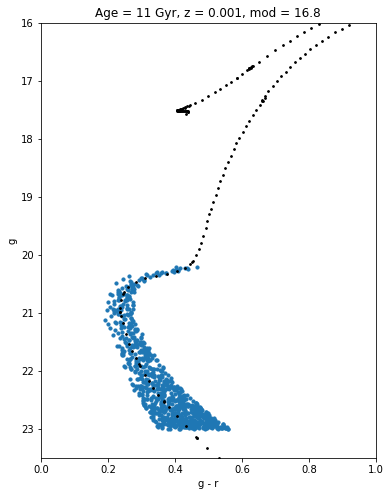

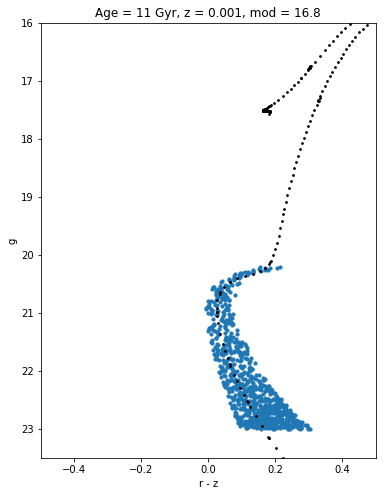

In [13]:
plt.figure(figsize=(6,8))
plt.scatter(g1-r1, g1, s = 10)
plt.xlim(0,1)
plt.ylim(23.5, 16)
plot_iso(iso, 'k')
plt.title('Age = 11 Gyr, z = 0.001, mod = 16.8')

plt.show()
    
    
plt.figure(figsize=(6,8))
plt.scatter(r1-z1, g1, s = 10)
plt.xlim(-0.5,0.5)
plt.ylim(23.5, 16)
plt.title('Age = 11 Gyr, z = 0.001, mod = 16.8')

plot_iso2(iso, 'k')

plt.show()

Using DES err!
Using DES err!


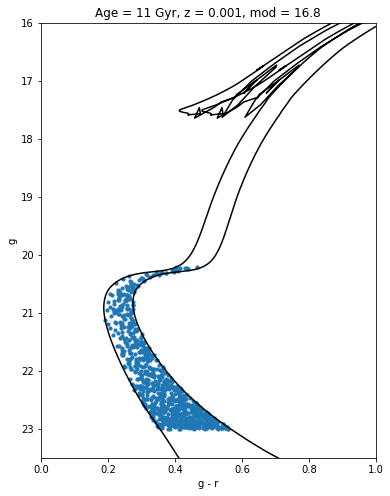

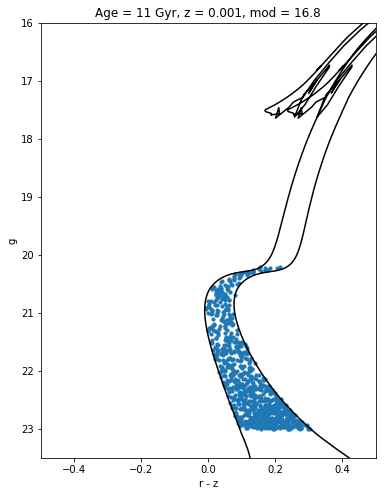

In [16]:
import filter_data
age = 11
metal = 0.001
mu = 16.8
mk = filter_data.mkpol(mu=mu, age=age, z=metal, dmu=0.5, C=[0.01, 0.05], E=3., err=None, survey='DECaLS')
mkz = filter_data.mkpol_grz(mu=mu, age=age, z=metal, dmu=0.5, C=[0.01, 0.05], E=3., err=None, survey='DECaLS')

plt.figure(figsize=(6,8))
plt.scatter(g1-r1, g1, s=10)
plt.xlim(0,1)
plt.ylim(23.5, 16)
plt.plot(mk[:,0], mk[:,1]+mu, c='k')
plt.title('Age = 11 Gyr, z = 0.001, mod = 16.8')
plt.xlabel('%s - %s'%('g','r')); plt.ylabel(iso.band_1)
plt.show()

plt.figure(figsize=(6,8))
plt.scatter(r1-z1, g1, s = 10)
plt.xlim(-0.5,0.5)
plt.ylim(23.5, 16)
plt.plot(mkz[:,0], mkz[:,1]+mu, c='k')
plt.title('Age = 11 Gyr, z = 0.001, mod = 16.8')
plt.xlabel('%s - %s'%('r','z')); plt.ylabel(iso.band_1)
plt.show()

## Plotting Density Plots

In [17]:
filename='/home/s1/nshipp/projects/stream_search/data/DECaLS_iso_hpxcube_z0.0010_a11.0_gmax23_gmin20.2_E3.fits.gz'
filename2 = 'test_hpxcube_pal13.fits.gz'
#filename3 = 'iso_hpxcube_desy6.fits.gz'

In [18]:
hpxcube, fracdet, modulus = density_plot.load_hpxcube(filename)
hpxcube2, fracdet2, modulus2 = density_plot.load_hpxcube(filename2)
#hpxcube3, fracdet3, modulus3 = density_plot.load_hpxcube(filename3)

Reading /home/s1/nshipp/projects/stream_search/data/DECaLS_iso_hpxcube_z0.0010_a11.0_gmax23_gmin20.2_E3.fits.gz...
Skipping fracdet...
Reading test_hpxcube_pal13.fits.gz...
Skipping fracdet...


### Using Nora's iso_hpxcube files

3145728


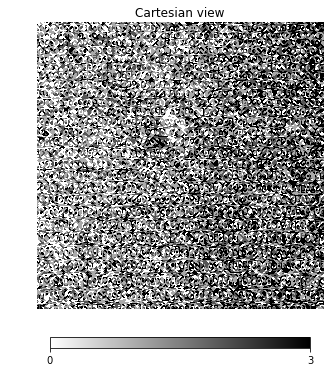

In [19]:
mu = 16.8
lon, lat = 345, 15
sigma = 0.1
data = density_plot.prepare_hpxmap(mu, hpxcube, fracdet, modulus, fracmin=0, clip=100, sigma=0.1)
#bkg = density_plot.fit_background(data, center=(lon,lat), coords='cel', proj='ortho', sigma=sigma, deg=5)
print(len(data))
hp.cartview(data, cmap='gray_r', max = 3, xsize = 2000, lonra=[ra-10, ra+10], latra = [dec-10,dec+10])
plt.ion()
plt.show()

### Using my iso_hpxcube file

3145728


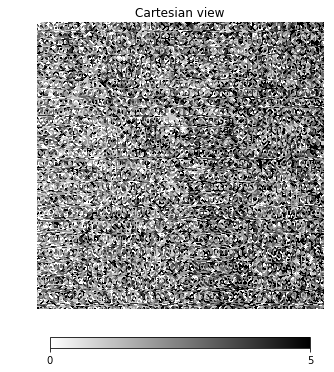

In [23]:
mu = 16.9
lon, lat = 345, 15
#sigma = 0.1
data2 = density_plot.prepare_hpxmap(mu, hpxcube2, fracdet2, modulus2, fracmin=0, clip=100, sigma=.1)
#bkg = density_plot.fit_background(data, center=(lon,lat), coords='cel', proj='ortho', sigma=sigma, deg=5)
print(len(data2))
hp.cartview(data2, cmap='gray_r', max = 5, lonra=[ra-10, ra+10], latra = [dec-10,dec+10])
plt.ion()
plt.show()

In [26]:
mu = 16.9
lon, lat = 345, 15
sigma = 0.1
data3 = density_plot.prepare_hpxmap(mu, hpxcube3, fracdet3, modulus3, fracmin=0, clip=100, sigma=0.2)
#bkg = density_plot.fit_background(data, center=(lon,lat), coords='cel', proj='ortho', sigma=sigma, deg=5)
print(len(data3))
hp.orthview(data3, cmap='gray_r', max = 15,xsize = 2000)
plt.figure(figsize=(20,20))
plt.ion()
plt.show()

NameError: name 'hpxcube3' is not defined

In [24]:
def plot_density(data, bkg, coords='cel', coord_stream=None, center=(0,0), proj='pal13', filename=None, smap=None, **kwargs):
    defaults = dict(cmap='gray_r', xsize=2000, smooth=0.1, vmin=vmin0, vmax=vmax0)
    setdefaults(kwargs, defaults)

    nside = hp.get_nside(data)

    if smap is None:
        plt.figure()
        #smap = skymap.Skymap(projection=proj, lon_0=center[0], lat_0=center[1], celestial=False)
        smap = skymap_factory(proj)
        smap = smap()

    if coords == 'gal':
        lon, lat = hp.pix2ang(nside, np.arange(len(data)), lonlat=True)
        galpix = hp.ang2pix(nside, *gal2cel(lon, lat), lonlat=True)
        # smap.draw_hpxmap((data - bkg)[galpix], **kwargs)
        # IS THIS RIGHT?
        smap.draw_hpxmap((data[galpix] - bkg), **kwargs)
        # smap.draw_hpxmap(data[galpix], **kwargs)
    elif coords == 'stream':
        if not coord_stream:
            print('Need to input coord_stream!')
        streampix = streamlib.get_streampix(data=data, stream=coord_stream)
        smap.draw_hpxmap((data[streampix] - bkg), **kwargs)

    else:
        smap = smap.draw_hpxmap((data - bkg), **kwargs)
        # smap.draw_hpxmap(data, **kwargs)

    if filename:
        plt.savefig(filename)
    
    smap
    return smap

In [25]:
bkg = 0
lon, lat = 346, 12
smap = density_plot.plot_density(data, bkg, center=(lon,lat), proj='pal13', smooth = 0.1, vmin0=0, vmax0=5)

NameError: global name 'vmin0' is not defined